In [1]:
# Importing Necessary Libraries

# conda install -c conda-forge camelot-py            (install this if camelot not already installed in your system)
# pip install camelot-py[cv]                         (if above installation not work please try this)
# https://www.ghostscript.com/download/gsdnld.html   (after successfully installation of camelot if python showing ghostscript error then use this link and download ghostscript)

import camelot
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', None) 
pd.set_option('display.max_rows',None)

In [2]:
# Assigning path of pdf file to variable
pdf = "test_input.pdf"

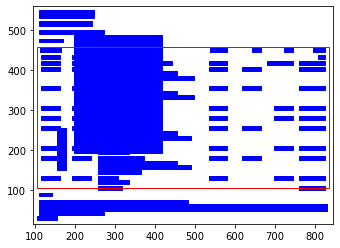

,0,1,2,3,4,5,6
0,Booking Date,Txn Date,Booking Text,Value Date,Debit,Credit,Balance
1,31.03.2018,31.03.2018,Initial Balance,,,,0.00
2,01.04.2018,01.04.2018,VALUE DATED BALANCE BROUGHT FORWARD,01.04.2018,,"180,431,640.00","180,431,640.00"
3,06.04.2018,06.04.2018,INTEREST-FIXED TERM LOAN,06.04.2018,"472,500.00",,"179,959,140.00"
4,,,Contract No: 3001-AA18091ZN72C|Interest rate:,,,,
5,,,"0.810000%|Capital: 1,000,000,000.00|Period: 16.03.2018 -",,,,
6,,,06.04.2018|Days: 21/360,,,,
7,06.04.2018,06.04.2018,INTEREST-FIXED TERM LOAN,06.04.2018,"315,000.00",,"179,644,140.00"
8,,,Contract No: 3001-AA1809166QNF|Interest rate:B anking,,,,
9,,,"0.810000%|Capital: 1,000,000,000.00|Period: 23.03.2018 -",,,,


In [3]:
# Passing Pdf file from camelot.
tb = camelot.read_pdf(pdf, flavor='stream', table_regions=['000,370,1000,120'],row_tol=10,strip_text='\n') # table_regions = for giving table position and we can ensure position by referring red box in visualization
camelot.plot(tb[0], kind='contour')
plt.show()
tb = tb[0].df
tb

---

***We can See that above extracted table is not in proper format and it is due to camelot limitations. So we have further preprocess it.***

---

***Creating the Function For Complete Preprocessing***

In [4]:
def Table_preprocessing(table):
    
    # Assigning first row as Header of table
    table = table.rename(columns=table.iloc[0])
    table.drop(table.index[0], inplace = True)
    table = table.reset_index(drop=True)
    
    # Removing Unwanted Special Character or Word From Date Columns by using replace function.
    table['Booking Date'] = table['Booking Date'].str.replace(r'[^\d.]+', '')
    table['Txn Date'] = table['Txn Date'].str.replace(r'[^\d.]+', '')
    
    # Removing Empty Rows and combining string columns.
    for i in range((len(table)-2),-1,-1):
        if table['Booking Date'][i] == '':
            table['Booking Text'][i-1] =  table['Booking Text'][i-1] + ' ' + (table['Booking Text'][i])
            table = table.drop([i], axis=0)
    
    # Here Require Preprocessing Done. Now we have prepare proper format of table columns. 
    
    
    # Converting format of date columns as (YYYY/MM/DD) as per requirement.  
    Date_columns = ['Booking Date', 'Txn Date', 'Value Date']
    for i in Date_columns:
        table[i] =  pd.to_datetime(table[i])
        table[i] = table[i].dt.strftime("%Y/%m/%d") # If we want date columns are in datetime datatype then comment this line of code.
   

    # Converting Data Type of numerical columns (str to int) and arranging in proper format.
    Date_colmuns = ['Debit','Credit', 'Balance']
    for j in Date_colmuns:
        table[j] = table[j].str.replace(',', '')
        table[j] = table[j].replace('', np.NaN)
        table[j] = table[j].astype(float) 
        
    table = table.reset_index(drop=True)
    return(table)

In [5]:
Final_Table = Table_preprocessing(tb)
Final_Table

,Booking Date,Txn Date,Booking Text,Value Date,Debit,Credit,Balance
0,2018/03/31,2018/03/31,Initial Balance,NaN,NaN,NaN,0.0
1,2018/01/04,2018/01/04,VALUE DATED BALANCE BROUGHT FORWARD,2018/01/04,NaN,180431640.0,180431640.0
2,2018/06/04,2018/06/04,"INTEREST-FIXED TERM LOAN Contract No: 3001-AA18091ZN72C|Interest rate: 0.810000%|Capital: 1,000,000,000.00|Period: 16.03.2018 - 06.04.2018|Days: 21/360",2018/06/04,472500.0,NaN,179959140.0
3,2018/06/04,2018/06/04,"INTEREST-FIXED TERM LOAN Contract No: 3001-AA1809166QNF|Interest rate:B anking 0.810000%|Capital: 1,000,000,000.00|Period: 23.03.2018 - 06.04.2018|Days: 14/360",2018/06/04,315000.0,NaN,179644140.0
4,2018/06/04,2018/06/04,FOREX SPOT EUR/JPY 130.7271,2018/06/04,NaN,472500.0,180116640.0
5,2018/06/04,2018/06/04,FOREX SPOT EUR/JPY 130.7021,2018/06/04,NaN,315000.0,180431640.0
6,2018/09/04,2018/09/04,"INTEREST-FIXED TERM LOAN Contract No: 3001-AA18091NTT8N|Interest rate: 0.810000%|Capital: 500,000,000.00|Period: 26.03.2018 - 09.04.2018|Days: 14/360",2018/09/04,157500.0,NaN,180274140.0
7,2018/09/04,2018/09/04,FOREX SPOTEUR/JPY 131.1407,2018/09/04,NaN,157500.0,180431640.0
8,2018/10/04,2018/10/04,"INTEREST-FIXED TERM LOAN Contract No: 3001-AA18091NL9XG|Interest rate: 0.810000%|Capital: 500,000,000.00|Period: 27.03.2018 -10.04.2018|Days: 14/360",2018/10/04,157500.0,NaN,180274140.0
9,2018/10/04,2018/10/04,FOREX SPOT EUR/JPY 131.1953,2018/10/04,NaN,157500.0,180431640.0


In [6]:
Final_Table.to_excel('Final_Table.xlsx', index=False)